In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

[[0.37454012 0.        ]
 [0.95071431 1.        ]
 [0.73199394 1.        ]
 [0.59865848 1.        ]
 [0.15601864 0.        ]
 [0.15599452 0.        ]
 [0.05808361 0.        ]
 [0.86617615 1.        ]
 [0.60111501 1.        ]
 [0.70807258 1.        ]
 [0.02058449 0.        ]
 [0.96990985 1.        ]
 [0.83244264 1.        ]
 [0.21233911 0.        ]
 [0.18182497 0.        ]
 [0.18340451 0.        ]
 [0.30424224 0.        ]
 [0.52475643 1.        ]
 [0.43194502 0.        ]
 [0.29122914 0.        ]
 [0.61185289 1.        ]
 [0.13949386 0.        ]
 [0.29214465 0.        ]
 [0.36636184 0.        ]
 [0.45606998 0.        ]
 [0.78517596 1.        ]
 [0.19967378 0.        ]
 [0.51423444 1.        ]
 [0.59241457 1.        ]
 [0.04645041 0.        ]
 [0.60754485 1.        ]
 [0.17052412 0.        ]
 [0.06505159 0.        ]
 [0.94888554 1.        ]
 [0.96563203 1.        ]
 [0.80839735 1.        ]
 [0.30461377 0.        ]
 [0.09767211 0.        ]
 [0.68423303 1.        ]
 [0.44015249 0.        ]


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


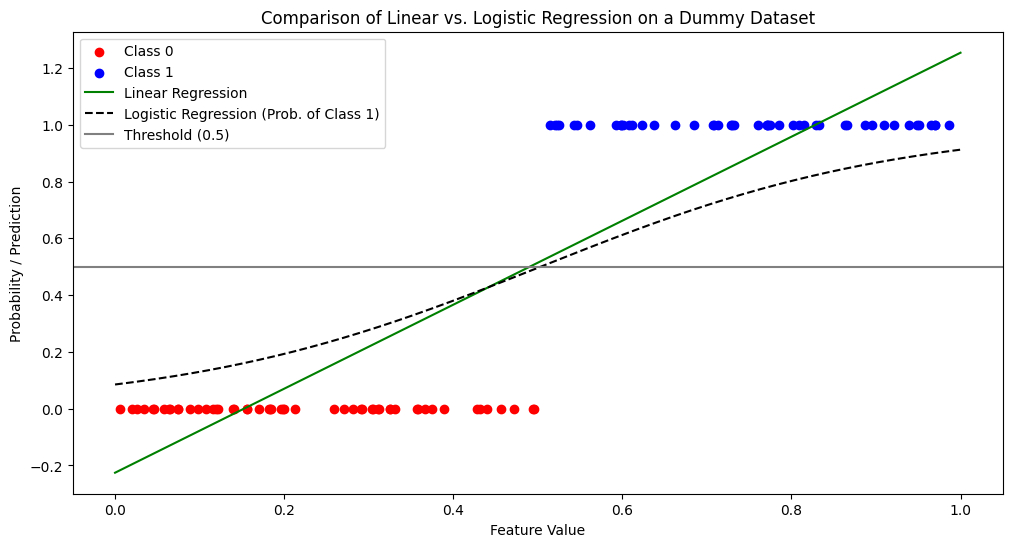

In [38]:

# Create a dummy dataset
np.random.seed(42)  # For reproducibility

# Features
X_dummy = np.random.rand(100, 1)  # 100 points in 1D



# Target variable with a clear boundary
y_dummy = (X_dummy > 0.5).astype(int)  # Class 0 if X <= 0.5, else Class 1
xy_combined = np.hstack((X_dummy, y_dummy.reshape(-1, 1)))
print(xy_combined)

# Fit linear regression and logistic regression models on the dummy dataset
linreg_dummy = LinearRegression().fit(X_dummy, y_dummy)
logreg_dummy = LogisticRegression().fit(X_dummy, y_dummy)

# Predictions
X_test_dummy = np.linspace(0, 1, 300).reshape(-1, 1)  

# Test data for predictions;
# This function creates an array of 300 evenly spaced values between 0 and 1, inclusive. 
#The purpose of generating this sequence is to cover the entire range of possible input values for our dummy feature 
# (since our dummy dataset was created with values between 0 and 1) and to see how the models respond across this entire range.
#This method reshapes the array into a 2D array with one column and as many rows as necessary to accommodate all 300 values. 
#The -1 in the reshape method is a placeholder that tells NumPy to calculate the number of rows automatically based on the length of the 
#array and the number of columns specified. Since Linear and Logistic Regression models in scikit-learn expect input data in a 2D array 
#format (where each row is a sample and each column is a feature), this reshaping step is necessary to prepare the data for making predictions. 
#Without reshaping, the data would be in a 1D array format, which could lead to shape-related errors when attempting to use the models 
#for predictions.


y_pred_linreg_dummy = linreg_dummy.predict(X_test_dummy)
y_pred_logreg_dummy = logreg_dummy.predict_proba(X_test_dummy)[:,1]  # Probability of class 1

# Plotting
plt.figure(figsize=(12, 6))

# Actual points
plt.scatter(X_dummy[y_dummy == 0], y_dummy[y_dummy == 0], color='red', label='Class 0')
plt.scatter(X_dummy[y_dummy == 1], y_dummy[y_dummy == 1], color='blue', label='Class 1')

# Linear regression predictions
plt.plot(X_test_dummy, y_pred_linreg_dummy, color='green', label='Linear Regression')

# Logistic regression predictions
plt.plot(X_test_dummy, y_pred_logreg_dummy, color='black', linestyle='--', label='Logistic Regression (Prob. of Class 1)')

plt.axhline(y=0.5, color='gray', linestyle='-', label='Threshold (0.5)')
plt.ylabel('Probability / Prediction')
plt.xlabel('Feature Value')
plt.title('Comparison of Linear vs. Logistic Regression on a Dummy Dataset')
plt.legend()
plt.show()

 # Odd Ratio :-  

## win/lose = P/(1-P)

The plot showcases a comparison between Linear and Logistic Regression on a dummy dataset designed to illustrate why linear regression is not typically used for classification tasks.

* **Linear Regression** (green line) predicts a continuous value that linearly increases with the feature value. It goes beyond the range of [0,1], which is not ideal for binary classification where the target variable should represent a probability (between 0 and 1) of belonging to a particular class.

* **Logistic Regression** (black dashed line) predicts probabilities that naturally fall within the [0,1] range, making it suitable for binary classification. The sigmoid function used in logistic regression ensures that the output is bounded between 0 and 1, clearly showing the probability of belonging to Class 1.

* The **Threshold** (0.5) (gray line) represents the decision boundary where values above this threshold predict Class 1, and values below predict Class 0. Logistic regression's probabilities clearly align with this threshold, whereas linear regression's continuous predictions do not naturally fit into this binary decision-making framework.

## Logistic Regression

Fundamentals of **Logistic Regression**

* It is used when the dependent variable is binary (e.g., 0 or 1; true or false; yes or no).
* It is Generalized Linear Models; 
use continuous values to predict  the probability; in logistic regression the y values are confined in between the values of 0 and 1 which are probability values;
* **Odds Ratios** : Instead of modeling the outcome directly, logistic regression models the odds ratio (the ratio of the probability of the event occurring to the probability of the event not occurring).

    * Odds are a way to represent the likelihood of an event occurring compared to it not occurring. Unlike probability, which directly measures the chance of an event happening out of the total possible outcomes, odds compare the number of favorable outcomes to the number of unfavorable outcomes.

    Example 1: If the odds in favor of your team winning a game are 1 to 4, it means for every game they win, they are expected to lose 4 games. The odds can be represented as a ratio of 1:4 or as a decimal 0.25 (1 divided by 4). This does not mean the team has a 25% chance of winning; instead, it's a comparative measure of winning vs. losing.

    Example 2: If the odds are 5 to 3 in favor of your team winning, it means for every 5 games won, they lose 3. The decimal representation is 1.67 (5 divided by 3), indicating a higher likelihood of winning compared to losing.

**Calculating Odds from Probabilities**
The probability of an event is the ratio of the number of favorable outcomes to the total number of outcomes. To convert probabilities to odds:
    •	Odds from Probability: If the probability of your team winning is 5/8 (5 wins out of 8 games), the odds are calculated as the ratio of the probability of winning to the probability of losing. Since the probability of losing is 3/8, the odds of winning are (5/8)/(3/8)=1.67.

**Log of Odds (Logit Function)**

The logit function takes the log of odds to address the asymmetry between values representing favorable and unfavorable outcomes. When odds are expressed in a log scale, the distance from neutrality (odds of 1:1) becomes symmetrical, whether the odds are in favor or against.

* **Symmetry in Log Scale**: If the odds of winning are 1:6 (unfavorable), the log(odds) is negative, indicating outcomes are against. For odds of 6:1 (favorable), the log(odds) is positive, with the same absolute value but opposite sign, showing symmetry in the log scale.
    
* **Logit Function**: The logit function is defined as log(p/1−p), where p is the probability of the event. This function maps the probability of an event to a real number, facilitating the use of linear regression techniques for binary outcomes in logistic regression.

**Implications**

•	Odds and Probability: Understanding the difference between odds and probability is crucial for interpreting data correctly. Odds provide a ratio of success to failure, while probability gives the likelihood of success.

•	Logit Function in Logistic Regression: The logit function forms the basis of logistic regression, enabling the modeling of binary outcomes. By using the log of odds, logistic regression can predict probabilities that are always between 0 and 1, and interpret changes in predictor variables in terms of their effect on the odds of the outcome.









In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [23]:
data = pd.read_csv("loan_data.csv")


In [24]:
# Calculate probabilities of loan approval for applicants with and without a credit history
prob_with_credit_history = data[data['Credit_History'] == 1]['Loan_Status'].value_counts(normalize=True)['Y']
prob_without_credit_history = data[data['Credit_History'] == 0]['Loan_Status'].value_counts(normalize=True)['Y']


# Calculate odds of loan approval for both groups
odds_with_credit_history = prob_with_credit_history / (1 - prob_with_credit_history)
odds_without_credit_history = prob_without_credit_history / (1 - prob_without_credit_history)

# Calculate the odds ratio
odds_ratio = odds_with_credit_history / odds_without_credit_history

prob_with_credit_history, prob_without_credit_history, odds_with_credit_history, odds_without_credit_history, odds_ratio


(0.8231292517006803,
 0.05263157894736842,
 4.653846153846155,
 0.05555555555555555,
 83.7692307692308)

Probability of Loan Approval:

Applicants with a credit history have a probability of loan approval of approximately 82.3%.
Applicants without a credit history have a significantly lower probability of loan approval, approximately 5.3%.
Odds of Loan Approval:

The odds of loan approval for applicants with a credit history are about 4.65.
For applicants without a credit history, the odds drop dramatically to approximately 0.056.
Odds Ratio:

The odds ratio comparing applicants with a credit history to those without is approximately 83.77.

#### Logistic Regression

Mathematical Model: The logistic regression model predicts the log-odds of the probability of the default class (e.g., loan being approved) as a linear combination of the independent variables X

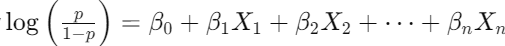

where p is the probability of the outcome,β0 is the intercept, and β1,β2,…,βn are the coefficients of the predictor variables.


Conversion to Probability: To convert the log-odds back to a probability, we use the logistic function:

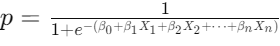

**Maximum Likelihood Estimation (MLE)**

MLE is a method used to estimate the parameters of a statistical model. In logistic regression, it selects the parameters (β0,β1,…,βn) that maximize the likelihood function, which represents the probability of observing the given data under those parameters. The likelihood function for logistic regression, given a dataset, is:

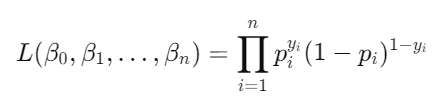

where pi is the predicted probability of the outcome for observation i (based on the logistic regression model), and yi is the actual observed outcome (0 or 1).
Maximizing this likelihood is a computational process, often requiring iterative optimization algorithms, because there's no closed-form solution. The goal is to find the set of parameters (β) that make the observed data most probable.


In [25]:
data['Credit_History'].fillna(data['Credit_History'].mean(), inplace=True)

In [26]:
# Preparing the data for logistic regression
X = data[['Credit_History']]  # Predictor variable


y = data['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)  # Binary outcome

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Coefficients
intercept = logistic_model.intercept_[0]
coefficients = logistic_model.coef_[0][0]

# Predicting on test set to evaluate
predictions = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

intercept, coefficients, accuracy

(-1.831582510393505, 3.400926754887034, 0.8181818181818182)